In [49]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
plt.style.use('fivethirtyeight')

In [11]:
data_path = "../data/"

In [12]:
os.listdir(data_path)

['olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv']

In [36]:
orders = pd.read_csv(data_path + 'olist_orders_dataset.csv')
order_items = pd.read_csv(data_path + 'olist_order_items_dataset.csv')
order_reviews = pd.read_csv(data_path + 'olist_order_reviews_dataset.csv')
products = pd.read_csv(data_path + 'olist_products_dataset.csv')

### Investigando individualmente cada DataFrame
#### Orders

In [37]:
print("Shape =", orders.shape)
orders.head(2)

Shape = (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [43]:
# transforming text datetime columns to datetime data type
orders_cols = orders.columns
for col in orders_cols[3:]:
    orders[col] = pd.to_datetime(orders[col])    

In [48]:
orders.describe(datetime_is_numeric=True, include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,0918eb0a00743c2cfeb69cce4fe4fe1e,4574518f4c6e0eef440e205139e125d6,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


*- Estamos olhando para um range de aproximadamente dois anos de vendas.*

In [17]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

*- A data estimada de entrega nunca esta vazia, deve significar que algum sistema inputa isto automaticamente no momento da criação do pedido.*  
Pode ser que exista sentido em ter campos com valores vazios nestas três colunas ('order_approved_at','order_delivered_carrier_date' e 'order_delivered_customer_date').  
Investigar isto pode nos ajudar a entender melhor a forma de coleta destes dados.

In [93]:
orders[orders['order_approved_at'].isna() == True].sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07
24115,33fe1cb532ac16a48902980e00c26da6,e0669fc658288e9aea6d958ea90fb9b7,canceled,2017-07-25 19:26:15,NaT,NaT,NaT,2017-08-28
53900,ade919610216d8fcd6333ce3696449a4,d7e2e0a2eaefbf557a9886e0c2032ace,canceled,2017-09-24 18:32:25,NaT,NaT,NaT,2017-10-23


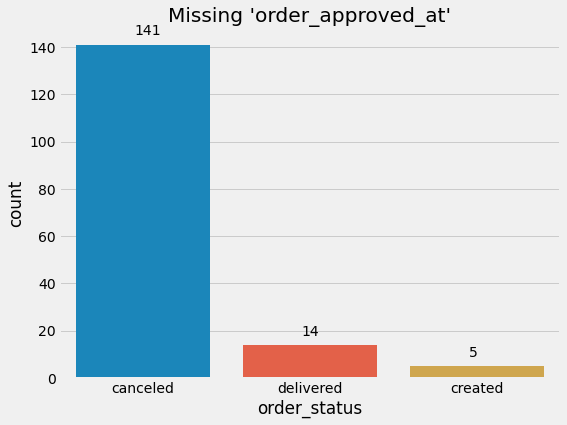

In [94]:
plt.figure(figsize=(8,6))

ax = sns.countplot(data=orders[orders['order_approved_at'].isna()], x='order_status')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+4))
        
plt.title("Missing 'order_approved_at'")
plt.show()

*- Faz sentido que ordens canceladas ou apenas criadas(aguardando aprovação) não tenham sido aprovadas em algum momento. Para isso, decidiram manter o campo vazio na coleta.*
##### Vamos investigar melhor as ordens com status "delivered"

In [63]:
orders[orders['order_approved_at'].isna()].isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                160
order_delivered_carrier_date     146
order_delivered_customer_date    146
order_estimated_delivery_date      0
dtype: int64

In [101]:
nan_approval_delivered = orders[(orders['order_approved_at'].isna()) & (orders['order_delivered_customer_date'].notna())]
print(f"Número de ordens entregues com data de aprovação vazia: {nan_approval_delivered.shape[0]}.")
nan_approval_delivered

Número de ordens entregues com data de aprovação vazia: 14.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


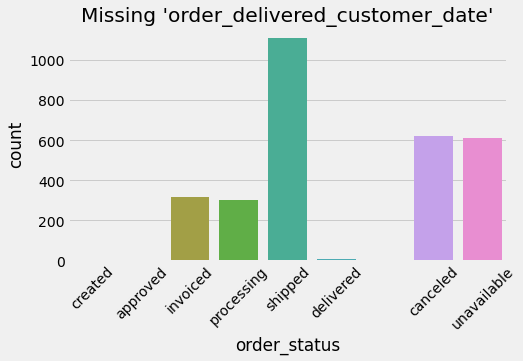

In [131]:
plt.figure(figsize=(7,4))

ax = sns.countplot(data=orders[orders['order_delivered_customer_date'].isna()], x='order_status', order=['created','approved','invoiced','processing','shipped','delivered','','canceled','unavailable'])
        
plt.title("Missing 'order_delivered_customer_date'")
plt.xticks(rotation=45)
plt.show()